In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Plotting
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))
df = pd.read_csv(filename)
print("Loaded:", filename)

Saving MobilePriceRange.csv to MobilePriceRange.csv
Loaded: MobilePriceRange.csv


In [ ]:
# First few rows to confirm our features
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (2000, 21)


,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


Question 3:

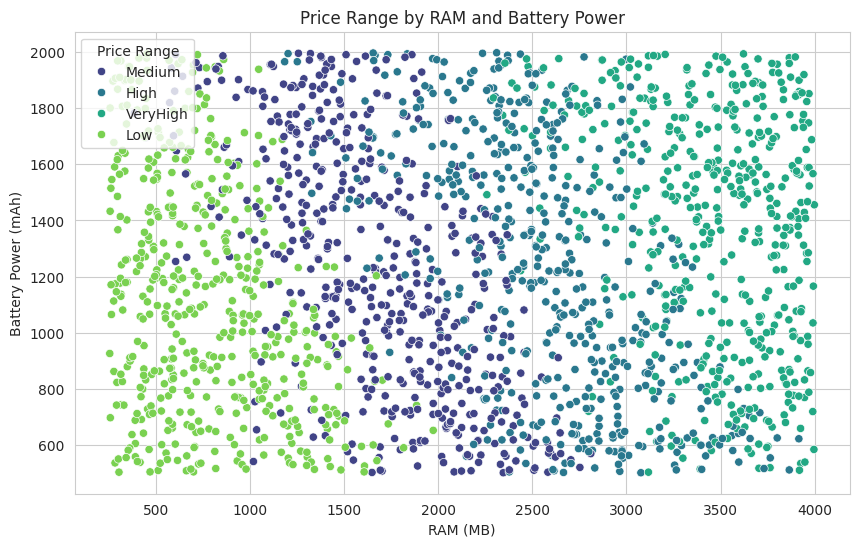

In [ ]:
# Select the two most suitable features and the target
X = df[['RAM', 'BatteryPower']]  # Features
y = df['PriceRange']              # Target

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['RAM'], y=df['BatteryPower'], hue=df['PriceRange'], palette='viridis')
plt.title('Price Range by RAM and Battery Power')
plt.xlabel('RAM (MB)')
plt.ylabel('Battery Power (mAh)')
plt.legend(title='Price Range')
plt.show()

In [ ]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1600
Testing set size: 400


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features have been scaled.")

Features have been scaled.


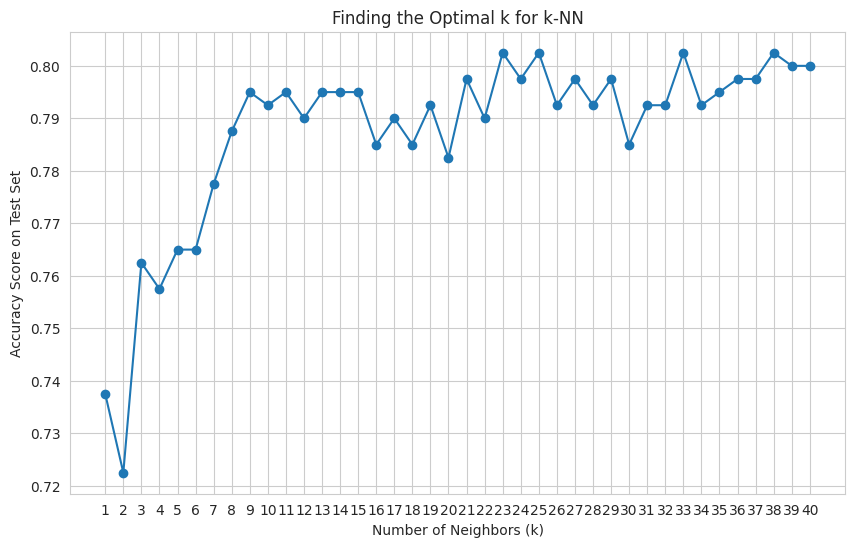


The optimal k is 23 with a test accuracy of 0.8025


In [ ]:
# Try k values from 1 to 40
k_range = range(1, 41)
accuracy_scores = []

# Loop over k values, train a model, and record the test accuracy
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the best k
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='-')
plt.title('Finding the Optimal k for k-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score on Test Set')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find and print the k that gave the highest accuracy
best_k = k_range[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"\nThe optimal k is {best_k} with a test accuracy of {best_accuracy:.4f}")

In [ ]:
# Now, train the final model using the best k we found
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Make final predictions
final_predictions = final_knn.predict(X_test_scaled)

# Evaluate the final model
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Model Accuracy with k={best_k}: {final_accuracy:.4f}\n")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, final_predictions))





Final Model Accuracy with k=23: 0.8025

Classification Report:
              precision    recall  f1-score   support

        High       0.64      0.73      0.68        92
         Low       0.92      0.92      0.92       105
      Medium       0.76      0.78      0.77        91
    VeryHigh       0.89      0.77      0.82       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400

